In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = \
    reuters.load_data(num_words=10000)

Using TensorFlow backend.
/home/sasaki/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sasaki/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sasaki/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sasaki/.local/lib/python3.6/site-packages/tensorflow/python

2113536/2110848 [==============================] - 8s 4us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = \
    dict([(value, key) for (key, value) in word_index.items()])
    
decorded_newswire = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[10]])

decorded_newswire

'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

In [8]:
train_labels[10]

3

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print('x_train.shape:', x_train.shape)
print('x_test.shape:', x_test.shape)

x_train.shape: (8982, 10000)
x_test.shape: (2246, 10000)


In [13]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

print(one_hot_train_labels.shape, one_hot_test_labels.shape)

(8982, 46) (2246, 46)


In [14]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print(one_hot_train_labels.shape, one_hot_test_labels.shape)

(8982, 46) (2246, 46)


In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [16]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [18]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 331us/step - loss: 2.6796 - accuracy: 0.5182 - val_loss: 1.7256 - val_accuracy: 0.6220
Epoch 2/20
7982/7982 [==============================] - 1s 178us/step - loss: 1.4254 - accuracy: 0.7032 - val_loss: 1.3237 - val_accuracy: 0.7200
Epoch 3/20
7982/7982 [==============================] - 1s 177us/step - loss: 1.0681 - accuracy: 0.7737 - val_loss: 1.1538 - val_accuracy: 0.7500
Epoch 4/20
7982/7982 [==============================] - 2s 236us/step - loss: 0.8407 - accuracy: 0.8167 - val_loss: 1.0512 - val_accuracy: 0.7820
Epoch 5/20
7982/7982 [==============================] - 2s 252us/step - loss: 0.6660 - accuracy: 0.8552 - val_loss: 0.9923 - val_accuracy: 0.7760
Epoch 6/20
7982/7982 [==============================] - 1s 183us/step - loss: 0.5311 - accuracy: 0.8880 - val_loss: 0.9334 - val_accuracy: 0.8160
Epoch 7/20
7982/7982 [==============================] - 1s 179us/step - los

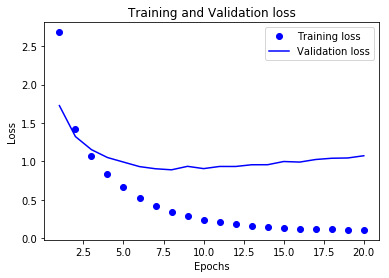

In [20]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


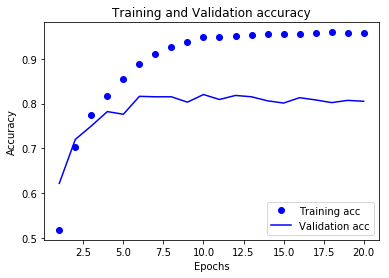

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
            partial_y_train,
            epochs=8,
            batch_size=512,
            validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 2s 226us/step - loss: 2.9153 - accuracy: 0.4924 - val_loss: 1.9112 - val_accuracy: 0.6370
Epoch 2/8
7982/7982 [==============================] - 1s 184us/step - loss: 1.5226 - accuracy: 0.7020 - val_loss: 1.3618 - val_accuracy: 0.7030
Epoch 3/8
7982/7982 [==============================] - 1s 157us/step - loss: 1.0869 - accuracy: 0.7726 - val_loss: 1.1608 - val_accuracy: 0.7540
Epoch 4/8
7982/7982 [==============================] - 1s 182us/step - loss: 0.8492 - accuracy: 0.8203 - val_loss: 1.0433 - val_accuracy: 0.7840
Epoch 5/8
7982/7982 [==============================] - 1s 151us/step - loss: 0.6736 - accuracy: 0.8611 - val_loss: 0.9739 - val_accuracy: 0.8020
Epoch 6/8
7982/7982 [==============================] - 1s 149us/step - loss: 0.5373 - accuracy: 0.8891 - val_loss: 0.9304 - val_accuracy: 0.8070
Epoch 7/8
7982/7982 [==============================] - 1s 182us/step - loss: 0.434

[0.9947738464878588, 0.7818343639373779]

In [28]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.1861086375779163

In [29]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [30]:
np.sum(predictions[0])

1.0000004

In [31]:
np.argmax(predictions[0])

3

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
            partial_y_train,
            epochs=20,
            batch_size=512,
            validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 271us/step - loss: 3.4836 - accuracy: 0.1320 - val_loss: 3.1991 - val_accuracy: 0.2700
Epoch 2/20
7982/7982 [==============================] - 2s 200us/step - loss: 2.9834 - accuracy: 0.2952 - val_loss: 2.8223 - val_accuracy: 0.2990
Epoch 3/20
7982/7982 [==============================] - 1s 157us/step - loss: 2.5756 - accuracy: 0.3292 - val_loss: 2.4819 - val_accuracy: 0.3240
Epoch 4/20
7982/7982 [==============================] - 1s 159us/step - loss: 2.2093 - accuracy: 0.3487 - val_loss: 2.1761 - val_accuracy: 0.3450
Epoch 5/20
7982/7982 [==============================] - 1s 188us/step - loss: 1.8724 - accuracy: 0.5496 - val_loss: 1.8779 - val_accuracy: 0.6510
Epoch 6/20
7982/7982 [==============================] - 1s 151us/step - loss: 1.5561 - accuracy: 0.6921 - val_loss: 1.6372 - val_accuracy: 0.6610
Epoch 7/20
7982/7982 [==============================] - 1s 173us/step - loss